In [3]:
import scipy as sp
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt

[ 1.40020439e-09 -9.38978366e-07  2.43991170e-04 -3.05539659e-02
  2.83354971e+00 -4.22963392e+01]


/Users/brett/.local/share/virtualenvs/probe-calibration-xk0Fp556/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.4210854715202004e-14,
 -2.842170943040401e-14,
 2.842170943040401e-14,
 2.842170943040401e-14,
 1.4210854715202004e-13,
 -2.8421709430404007e-13]

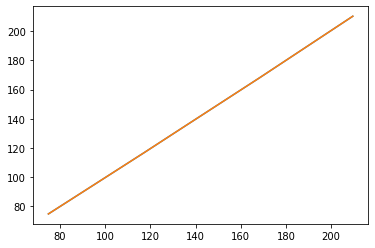

In [16]:
def rational(x, p, q):
    """
    The general rational function description.
    p is a list with the polynomial coefficients in the numerator
    q is a list with the polynomial coefficients (except the first one)
    in the denominator
    The zeroth order coefficient of the denominator polynomial is fixed at 1.
    Numpy stores coefficients in [x**2 + x + 1] order, so the fixed
    zeroth order denominator coefficent must comes last. (Edited.)
    """
    return np.polyval(p, x) / np.polyval(q + [1.0], x)

def rational4_4(x, p0, p1, p2, p3, p4, p5, q1, q2, q3, q4, q5):
    return np.polyval([p0, p1, p2, p3, p4, p5, q1, q2, q3, q4, q5], x)
    #return rational(x, [p0, p1, p2, p3, p4, p5], [q1, q2, q3, q4, q5])

def foo(x, p0, p1, p2, p3, p4, p5):
    coefficients = [p0, p1, p2, p3, p4, p5]
    return np.polyval(coefficients, x)

def bar(x, coefficients):
    r = coefficients[0]
    for i in range(1, len(coefficients)):
        r = r * x + coefficients[i]
    return r


hlt = [74.3, 93.6, 116.4, 133.9, 167.7, 209.4]
mlt_in = [74.7, 94.0, 116.7, 134.70, 167.6, 209.3]
mlt_out = [74.9, 94.2, 117.1, 135.00, 168.5, 209.6]
boil = [75.7, 95.0, 117.9, 135.30, 168.9, 210.8]

x = mlt_out
y = [74.8, 93.9, 116.6, 134.6, 168.2, 210.2]

#popt, pcov = sp.optimize.curve_fit(rational4_4, x, y, method='dogbox')
popt, pcov = sp.optimize.curve_fit(foo, x, y, method='dogbox')
print(popt)

plt.plot(x, y, label='original')
#plt.plot(x, rational4_4(x, *popt), label='fit')
plt.plot(x, foo(x, *popt), label='fit')

#[foo(q, *popt) - r for q, r in zip(x, y)]
[bar(q, popt) - r for q, r in zip(x, y)]

